In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [2]:
tb_data = pd.read_csv('../data/TB Cases, Percents, and Rates by Origin of Birth and Race.csv')
tb_data

,year,cases_total,cases_us_born,pct_us_born,rate_us_born,cases_non_us_born,pct_non_us_born,rate_non_us_born,cases_indig,pct_indig,...,rate_asian,cases_black,pct_black,rate_black,cases_white,pct_white,rate_white,cases_hispanic,pct_hispanic,rate_hispanic
0,2021,7882,2223,28.2,0.8,5626,71.4,12.5,87,1.1,...,14.4,1420,18.0,3.4,884,11.2,0.4,2410,30.6,3.8
1,2020,7171,2007,28.0,0.7,5145,71.7,11.7,77,1.1,...,13.2,1413,19.7,3.4,777,10.8,0.4,2132,29.7,3.4
2,2019,8898,2520,28.3,0.9,6371,71.6,14.2,81,0.9,...,16.6,1751,19.7,4.3,1007,11.3,0.5,2691,30.2,4.5
3,2018,8998,2640,29.3,0.9,6355,70.6,14.3,103,1.1,...,17.2,1797,20.0,4.4,1067,11.9,0.5,2624,29.2,4.4
4,2017,9069,2661,29.3,1.0,6402,70.6,14.7,93,1.0,...,17.8,1909,21.0,4.7,1055,11.6,0.5,2553,28.2,4.4
5,2016,9240,2882,31.2,1.0,6353,68.8,14.7,110,1.2,...,18.0,1985,21.5,4.9,1195,12.9,0.6,2590,28.0,4.5
6,2015,9538,3126,32.8,1.1,6407,67.2,15.3,145,1.5,...,19.0,1998,20.9,5.0,1234,12.9,0.6,2700,28.3,4.8
7,2014,9382,3110,33.1,1.1,6266,66.8,15.5,118,1.3,...,18.4,2009,21.4,5.1,1235,13.2,0.6,2751,29.3,5.0
8,2013,9539,3319,34.8,1.2,6211,65.1,15.7,124,1.3,...,19.1,2087,21.9,5.3,1407,14.7,0.7,2692,28.2,5.0
9,2012,9923,3615,36.4,1.3,6306,63.5,16.0,134,1.4,...,19.3,2245,22.6,5.8,1555,15.7,0.8,2787,28.1,5.3


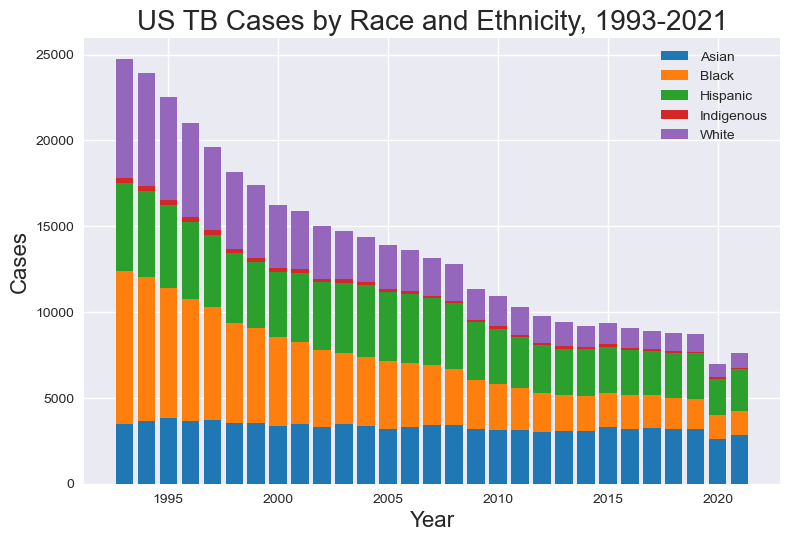

In [64]:
years = tb_data.year
groups = years[::-1]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

values = np.array(
    [
        tb_data.cases_asian.tolist()[::-1],
        tb_data.cases_black.tolist()[::-1],
        tb_data.cases_hispanic.tolist()[::-1],
        tb_data.cases_indig.tolist()[::-1],
        tb_data.cases_white.tolist()[::-1],
    ]
)

fig, ax = plt.subplots()

for i in range(values.shape[0]):
    ax.bar(groups, values[i], bottom=np.sum(values[:i], axis=0), color=colors[i])

plt.xlabel("Year", fontsize=16)
plt.ylabel("Cases", fontsize=16)
plt.legend(["Asian", "Black", "Hispanic", "Indigenous", "White"])
plt.title("US TB Cases by Race and Ethnicity, 1993-2021", fontsize=20)
plt.show()

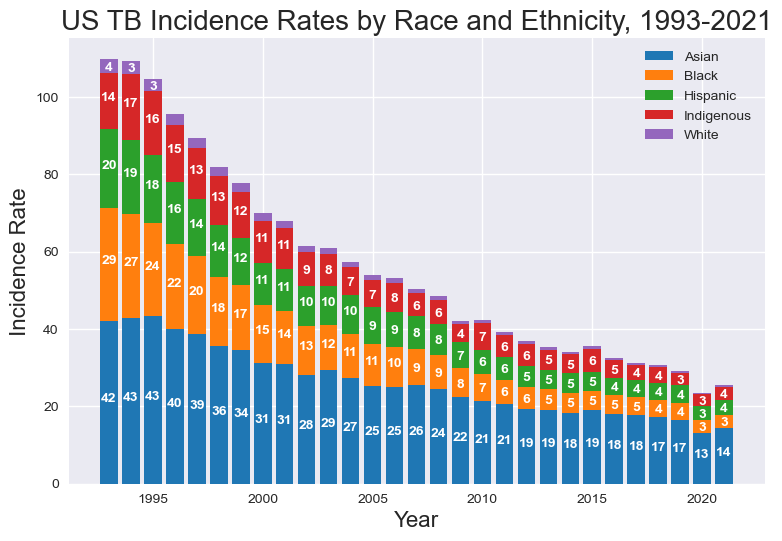

In [60]:
years = tb_data.year
groups = years[::-1]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

values = np.array(
    [
        tb_data.rate_asian.tolist()[::-1],
        tb_data.rate_black.tolist()[::-1],
        tb_data.rate_hispanic.tolist()[::-1],
        tb_data.rate_indig.tolist()[::-1],
        tb_data.rate_white.tolist()[::-1],
    ]
)

fig, ax = plt.subplots()

for i in range(values.shape[0]):
    ax.bar(groups, values[i], bottom=np.sum(values[:i], axis=0), color=colors[i])

for bar in ax.patches:
    if bar.get_height() > 10:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y(),
            round(bar.get_height()),
            ha="center",
            color="w",
            weight="bold",
            size=10,
        )
    elif (bar.get_height() > 3) and (bar.get_height() <= 10):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y(),
            round(bar.get_height()),
            ha="center",
            va="center_baseline",
            color="w",
            weight="bold",
            size=10,
        )

plt.xlabel("Year", fontsize=16)
plt.ylabel("Incidence Rate", fontsize=16)
plt.legend(["Asian", "Black", "Hispanic", "Indigenous", "White"])
plt.title("US TB Incidence Rates by Race and Ethnicity, 1993-2021", fontsize=20)
plt.show()

In [47]:
ax.patches[50].get_height()

5.100000000000001

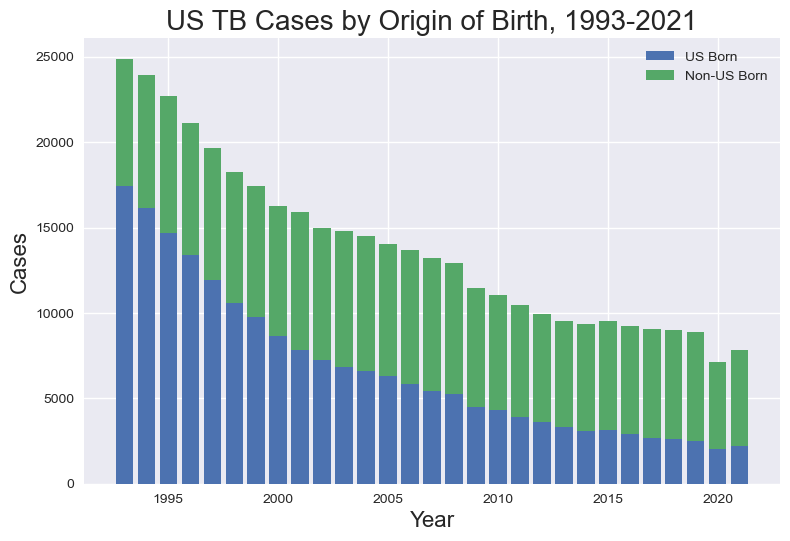

In [28]:
years = tb_data.year
X = years[::-1]
y1 = np.array(tb_data.cases_us_born.tolist()[::-1])
y2 = np.array(tb_data.cases_non_us_born.tolist()[::-1])

# plot bars in stack manner
plt.bar(X, y1)
plt.bar(X, y2, bottom=y1)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Cases", fontsize=16)
plt.legend(["US Born", "Non-US Born"])
plt.title("US TB Cases by Origin of Birth, 1993-2021", fontsize=20)
plt.show()

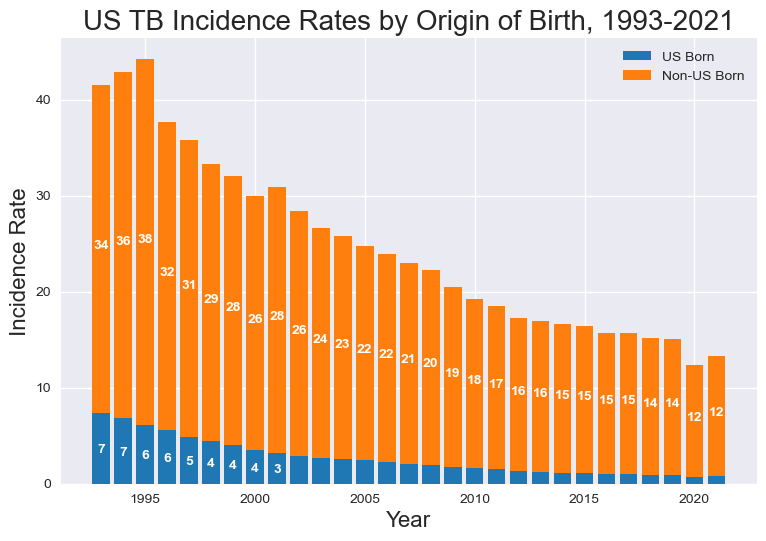

In [63]:
years = tb_data.year
groups = years[::-1]
colors = ["tab:blue", "tab:orange"]

values = np.array(
    [tb_data.rate_us_born.tolist()[::-1], tb_data.rate_non_us_born.tolist()[::-1]]
)

fig, ax = plt.subplots()

for i in range(values.shape[0]):
    ax.bar(groups, values[i], bottom=np.sum(values[:i], axis=0), color=colors[i])

for bar in ax.patches:
    if bar.get_height() > 10:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y(),
            round(bar.get_height()),
            ha="center",
            color="w",
            weight="bold",
            size=10,
        )
    elif (bar.get_height() > 3) and (bar.get_height() <= 10):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y(),
            round(bar.get_height()),
            ha="center",
            va="center_baseline",
            color="w",
            weight="bold",
            size=10,
        )

plt.xlabel("Year", fontsize=16)
plt.ylabel("Incidence Rate", fontsize=16)
plt.legend(["US Born", "Non-US Born"])
plt.title("US TB Incidence Rates by Origin of Birth, 1993-2021", fontsize=20)
plt.show()

In [9]:
tb = pd.read_csv('../data/TB cases and deaths.csv')
tb

,year,tb_cases,tb_rate,pct_change,pct_change_rate,tb_death,tb_death_rate,pct_change_death,pct_change_death_rate
0,2021,7882,2.4,9.9,9.8,NaN,NaN,NaN,NaN
1,2020,7171,2.2,-19.4,-20.2,600.0,0.2,14.1,13.0
2,2019,8898,2.7,-1.1,-1.6,526.0,0.2,-3.0,-3.4
3,2018,8998,2.8,-0.8,-1.3,542.0,0.2,5.2,4.7
4,2017,9069,2.8,-1.9,-2.5,515.0,0.2,-2.5,-3.1
...,...,...,...,...,...,...,...,...,...
64,1957,67149,39.0,-3.9,-5.8,13390.0,7.8,-5.3,-7.1
65,1956,69895,41.4,-9.7,-11.1,14137.0,8.4,-5.9,-7.7
66,1955,77368,46.6,-3.0,-4.7,15016.0,9.1,-9.1,-10.8
67,1954,79775,48.9,-5.4,-7.0,16527.0,10.2,-16.1,-17.7


In [18]:
plt.style.use('seaborn')

/var/folders/73/xg_s806n4y53k4bc7l5f6l800000gn/T/ipykernel_18991/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


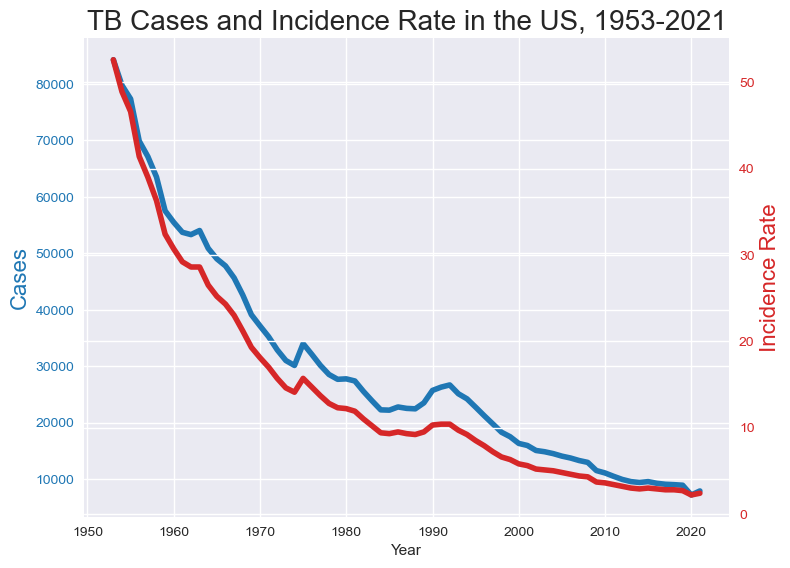

In [22]:
X = tb.year.tolist()[::-1]
y1 = np.array(tb.tb_cases.tolist()[::-1])
y2 = np.array(tb.tb_rate.tolist()[::-1])

color = 'tab:blue'
fig, ax1 = plt.subplots()
ax1.set_xlabel("Year")
ax1.set_ylabel("Cases", color=color, fontsize=16)
ax1.plot(X, y1, color=color, lw=4)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()


color = "tab:red"
ax2.set_ylabel('Incidence Rate', color=color, fontsize=16)
ax2.plot(X, y2, color=color, lw=4)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("TB Cases and Incidence Rate in the US, 1953-2021", fontsize=20)
plt.show()

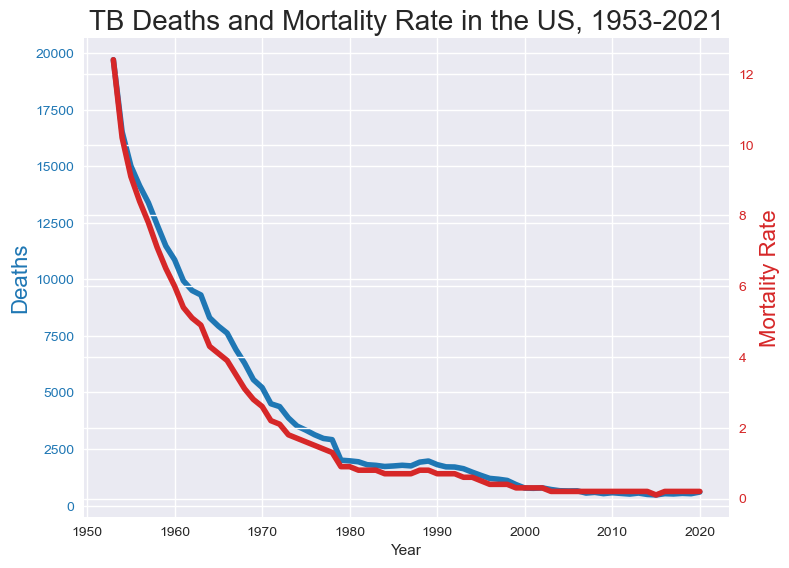

In [23]:
X = tb.year.tolist()[::-1]
y1 = np.array(tb.tb_death.tolist()[::-1])
y2 = np.array(tb.tb_death_rate.tolist()[::-1])

color = "tab:blue"
fig, ax1 = plt.subplots()
ax1.set_xlabel("Year")
ax1.set_ylabel("Deaths", color=color, fontsize=16)
ax1.plot(X, y1, color=color, lw=4)
ax1.tick_params(axis="y", labelcolor=color)

ax2 = ax1.twinx()


color = "tab:red"
ax2.set_ylabel("Mortality Rate", color=color, fontsize=16)
ax2.plot(X, y2, color=color, lw=4)
ax2.tick_params(axis="y", labelcolor=color)

fig.tight_layout()
plt.title("TB Deaths and Mortality Rate in the US, 1953-2021", fontsize=20)
plt.show()

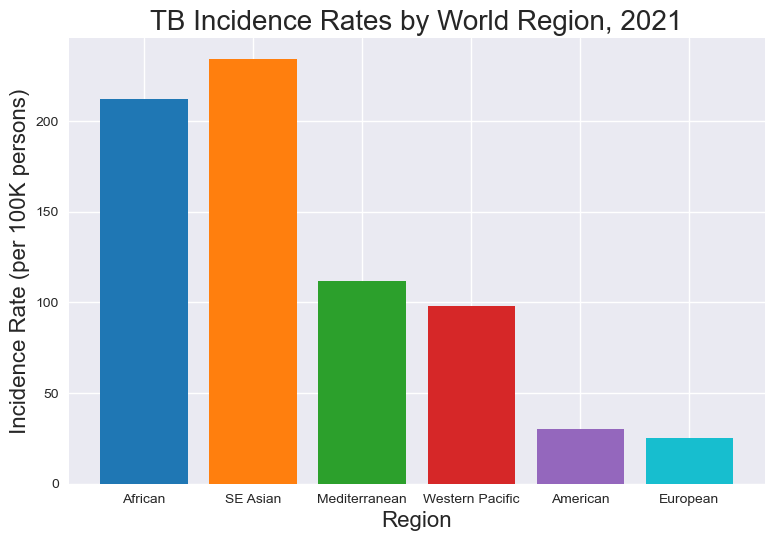

In [68]:
X = ["African", "SE Asian", "Mediterranean", "Western Pacific", "American", "European"]
y = [212, 234, 112, 98, 30, 25]
color = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:cyan"]
plt.bar(X, y, color=color)

plt.xlabel("Region", fontsize=16)
plt.ylabel("Incidence Rate (per 100K persons)", fontsize=16)
plt.title("TB Incidence Rates by World Region, 2021", fontsize=20)
plt.show()